In [190]:
#pip install ip2geotools
#pip install ipinfo
#conda install -c anaconda basemap

In [218]:

import pandas as pd 
#import data from csv
files = ["/tmp/.imp72662/crawler.csv","/tmp/.imp72674/crawler.csv","/tmp/.imp73008/crawler.csv","/tmp/.imp73030/crawler.csv","/tmp/.imp73069/crawler.csv","/tmp/.imp73108/crawler.csv","/tmp/.imp73153/crawler.csv","/tmp/.imp73340/crawler.csv","/tmp/.imp73385/crawler.csv","/tmp/.imp73422/crawler.csv","/tmp/.imp73459/crawler.csv"]
dfs = []
for file in files:
    df = pd.read_csv(file) 
    df.drop(columns=['index'])
    dfs.append(df)

df = pd.concat(dfs).drop_duplicates(subset="node_id", keep = 'first').reset_index(drop=True)
df.set_index('node_id')
len(df)

194

In [219]:
from collections import Counter 
node_ids = df["node_id"].to_list()
node_ids = [node_id.strip() for node_id in node_ids]
node_ids_freq = [Counter(node_id) for node_id in node_ids]
hex_chars = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
freqs = []
for node_id_freq in node_ids_freq:
    freqs.append([node_id_freq[hex_char] for hex_char in hex_chars])
    


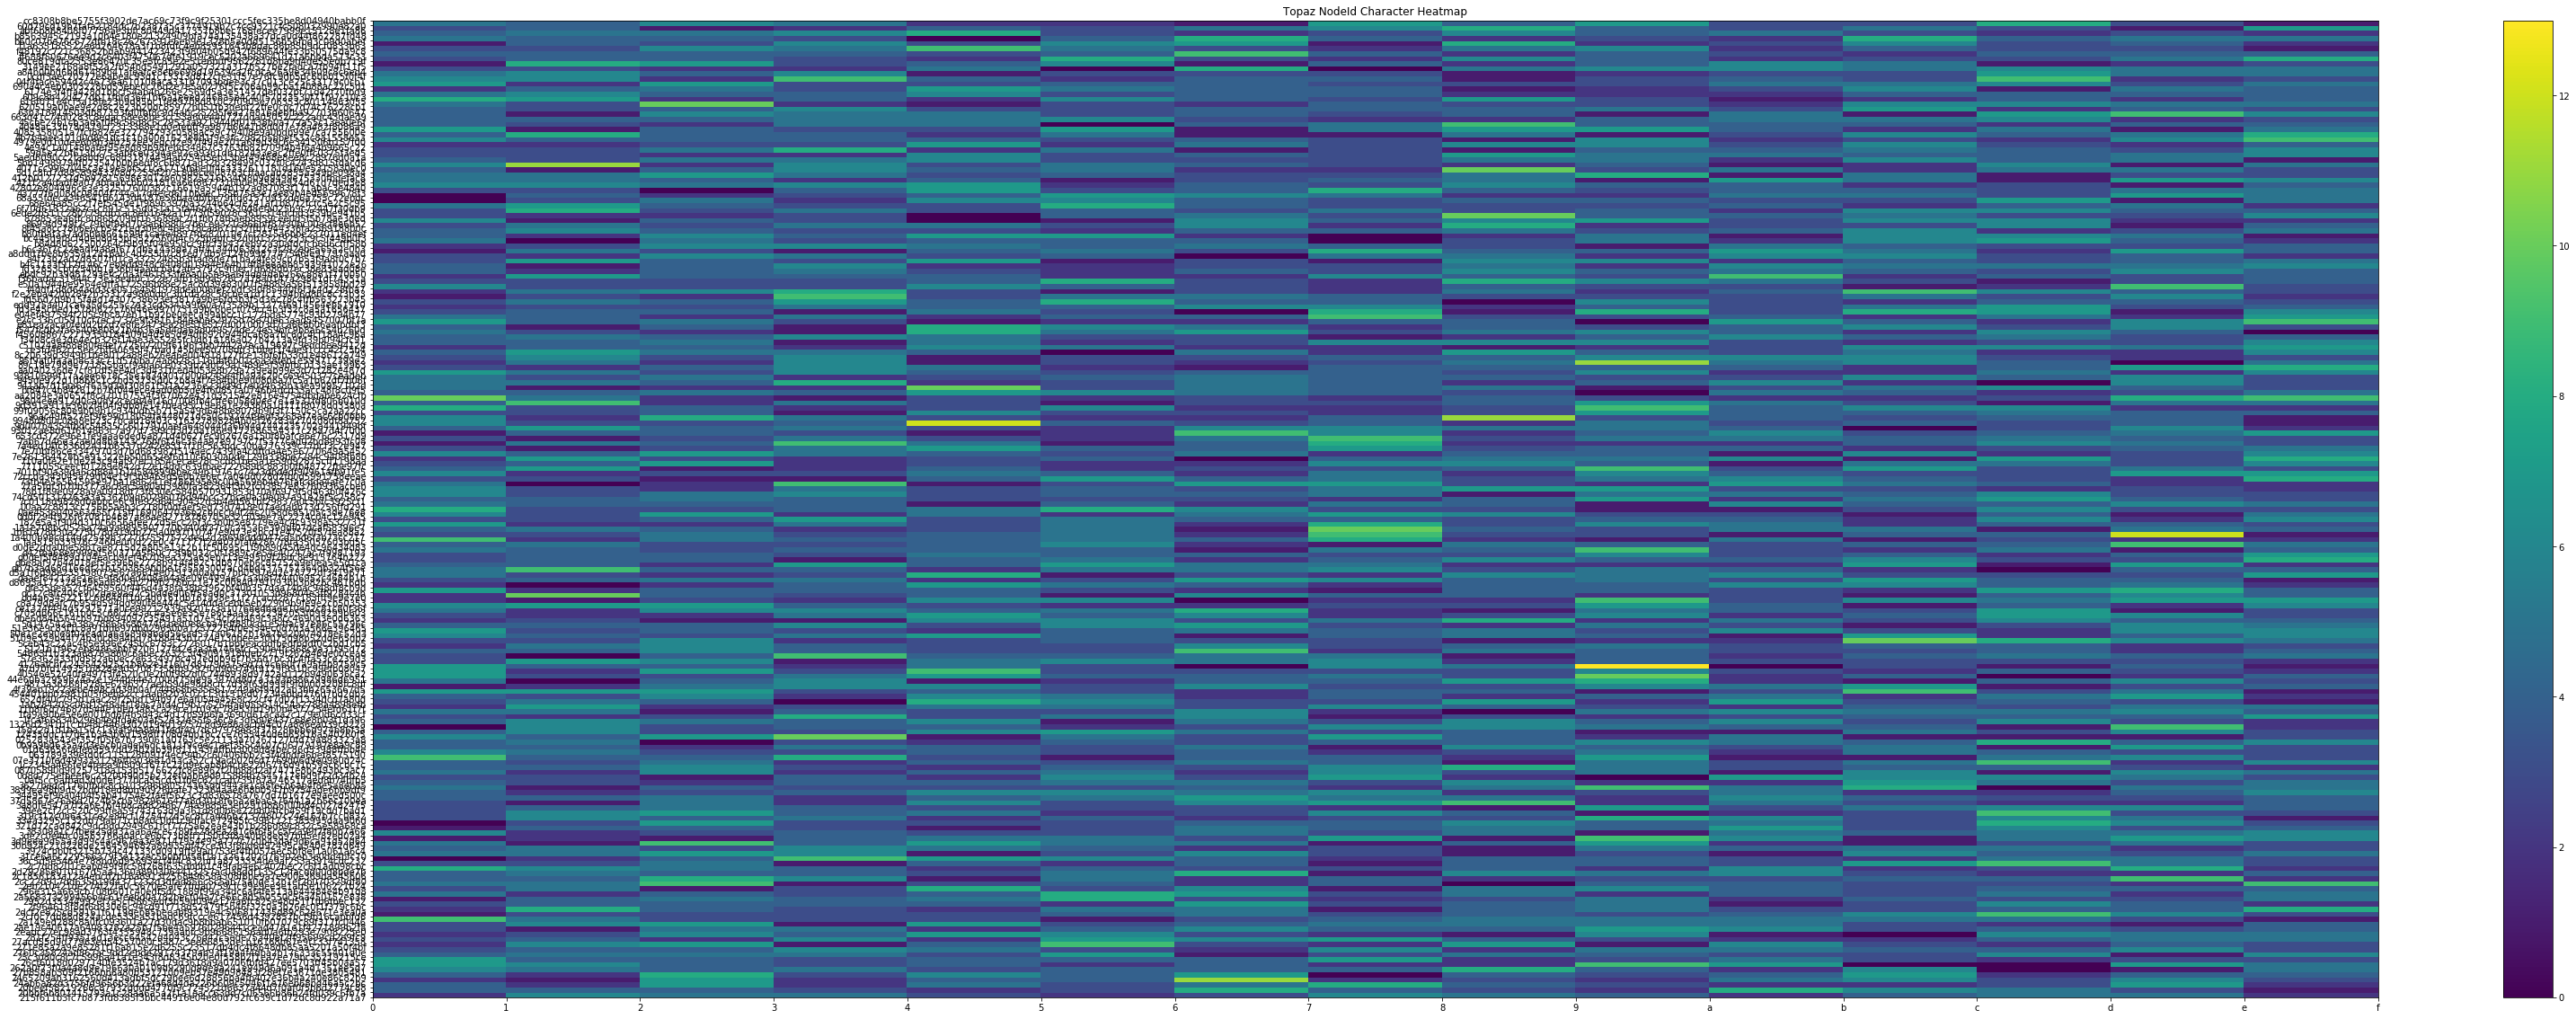

In [220]:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.meshgrid(hex_chars, node_ids)
intensity = np.array(freqs)


plt.title('Topaz NodeId Character Heatmap')
plt.rcParams["figure.figsize"] = (50,20)
plt.pcolormesh(x, y, intensity)
plt.colorbar()
plt.show()

In [221]:
import string
from collections import Counter 

peer_ids = df["peer_id"].to_list()

peer_ids_freq = [Counter(peer_id) for peer_id in peer_ids]
ascii_chars = [char for char in string.ascii_letters] + ['0','1','2','3','4','5','6','7','8','9']
freqs = []
for peer_id_freq in peer_ids_freq:
    freqs.append([peer_id_freq[char] for char in ascii_chars])

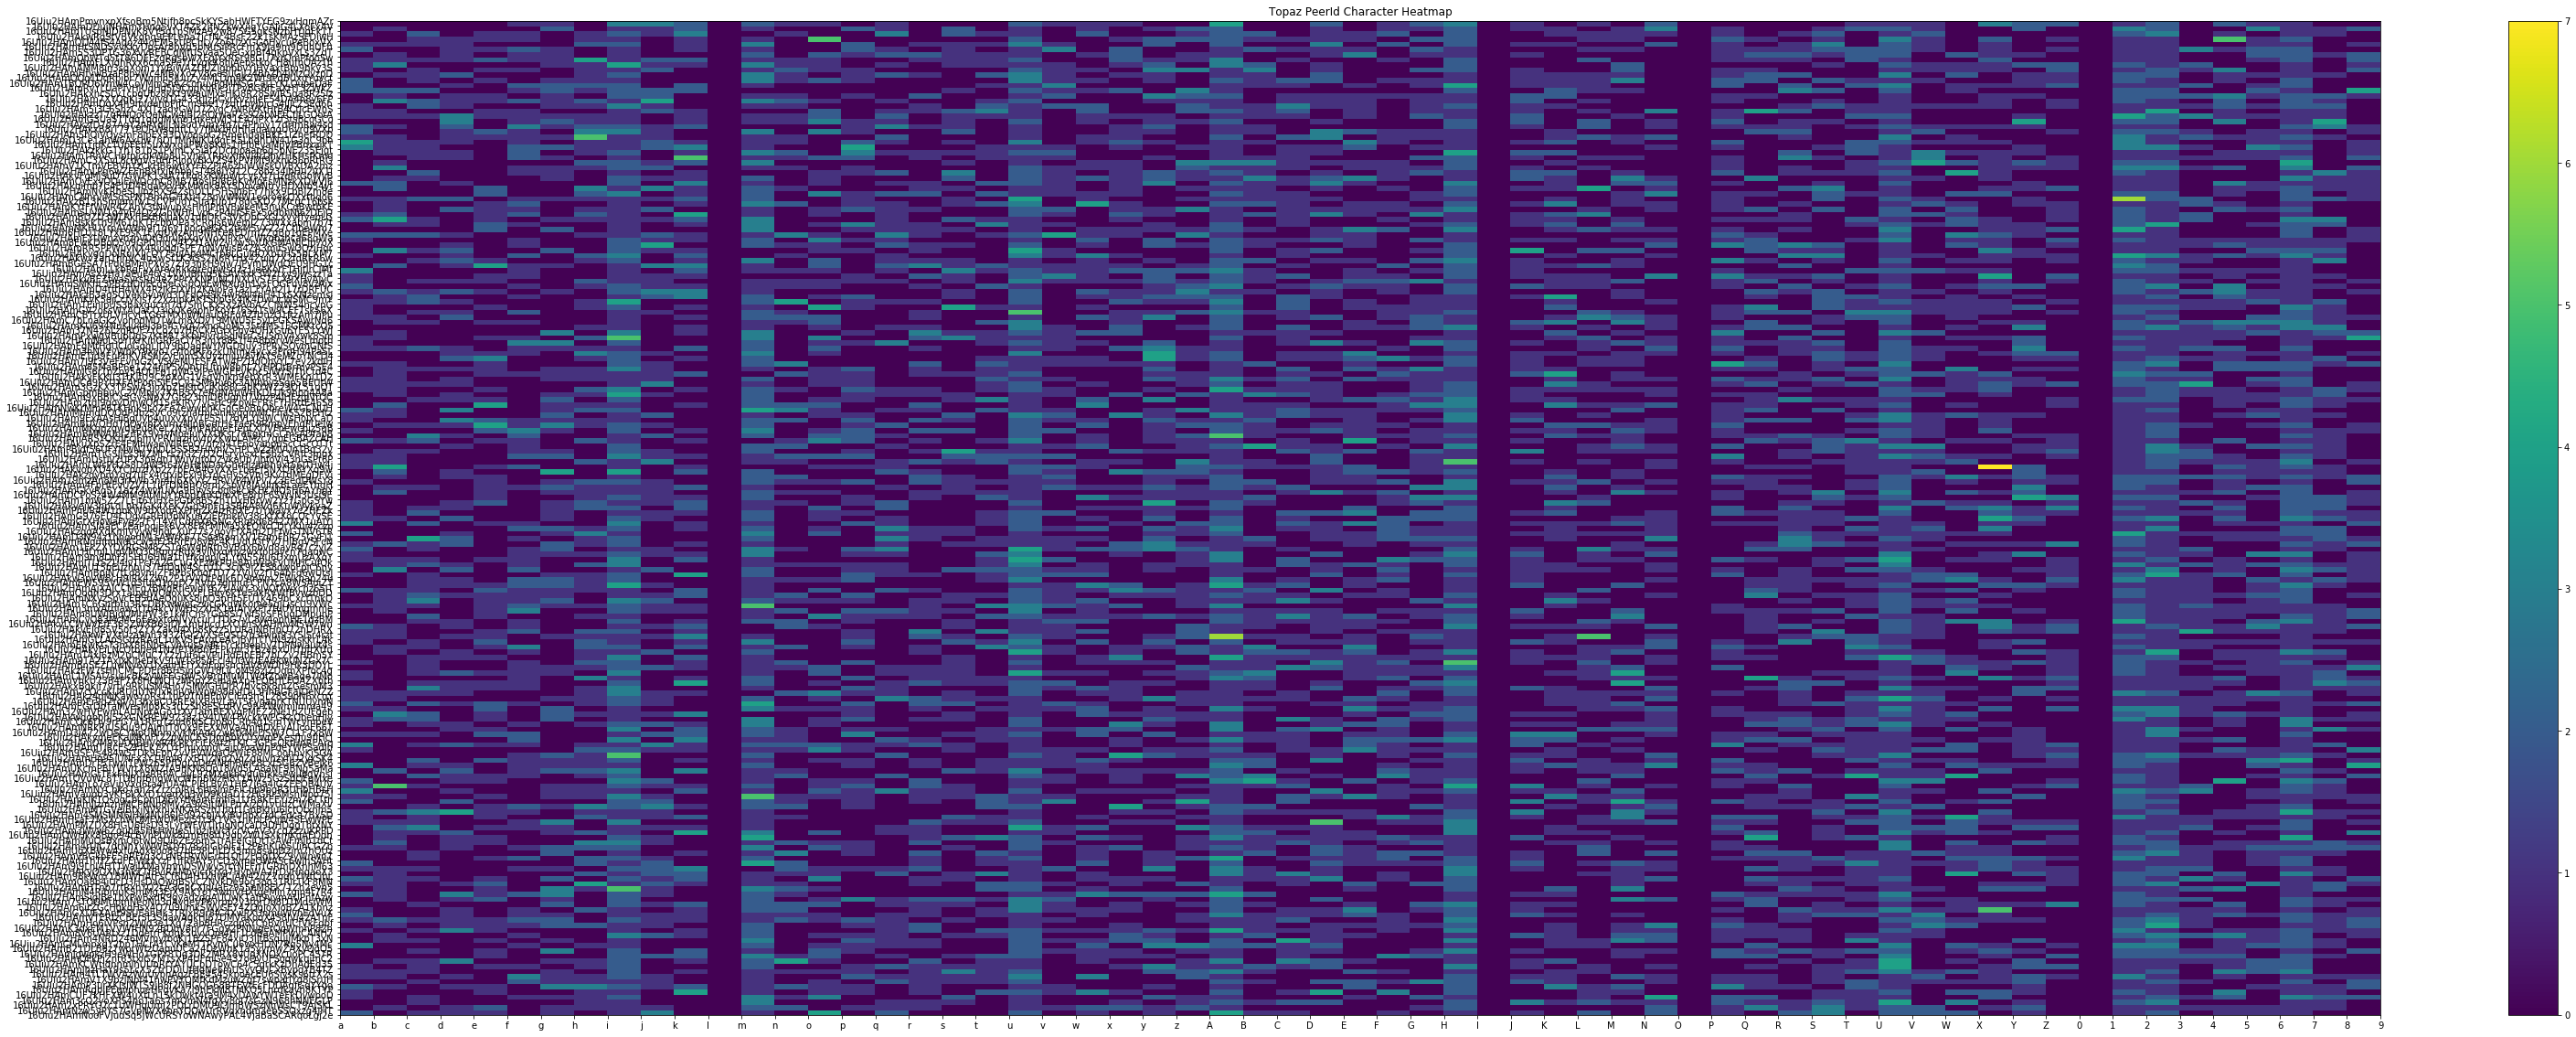

In [222]:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.meshgrid(ascii_chars, peer_ids)
intensity = np.array(freqs)


plt.title('Topaz PeerId Character Heatmap')
plt.rcParams["figure.figsize"] = (50,20)
plt.pcolormesh(x, y, intensity)
plt.colorbar() 
plt.show() 

In [114]:
#from ip2geotools.databases.noncommercial import DbIpCity
#from ip2geotools.databases.noncommercial import Ipstack
#from ipaddress import ip_address

#ips = df["ip4"].to_list()
#bad_ips=["34.87.177.140","68.183.226.13","128.199.150.25","172.104.55.198"]
#ips = list(set(ips)-set(bad_ips))
#filtered_ips=[]
#for ip in ips:
#  a = ip_address(ip)
#  if not a.is_private:
#    filtered_ips.append(ip)
    
#ips_info_ip_city = [DbIpCity.get(ip, api_key='free') for ip in filtered_ips]
#ips_info = [Ipstack.get(ip, api_key='') for ip in filtered_ips]
#ips_info=[]
#for ip in filtered_ips:
#    print(ip)
#    ips_info.append(DbIpCity.get(ip, api_key='free'))



In [223]:
import ipinfo
ips = df["ip4"].to_list()
handler = ipinfo.getHandler('')

ips_info = [handler.getDetails(ip) for ip in ips]

In [148]:
import pprint
#pprint.pprint(ips_info[1].all)
ips_info[35].all

{'ip': '188.192.142.192',
 'hostname': 'ipbcc08ec0.dynamic.kabel-deutschland.de',
 'city': 'Augsburg',
 'region': 'Bavaria',
 'country': 'DE',
 'loc': '48.3715,10.8985',
 'org': 'AS31334 Vodafone Kabel Deutschland GmbH',
 'postal': '86152',
 'timezone': 'Europe/Berlin',
 'country_name': 'Germany',
 'latitude': '48.3715',
 'longitude': '10.8985'}

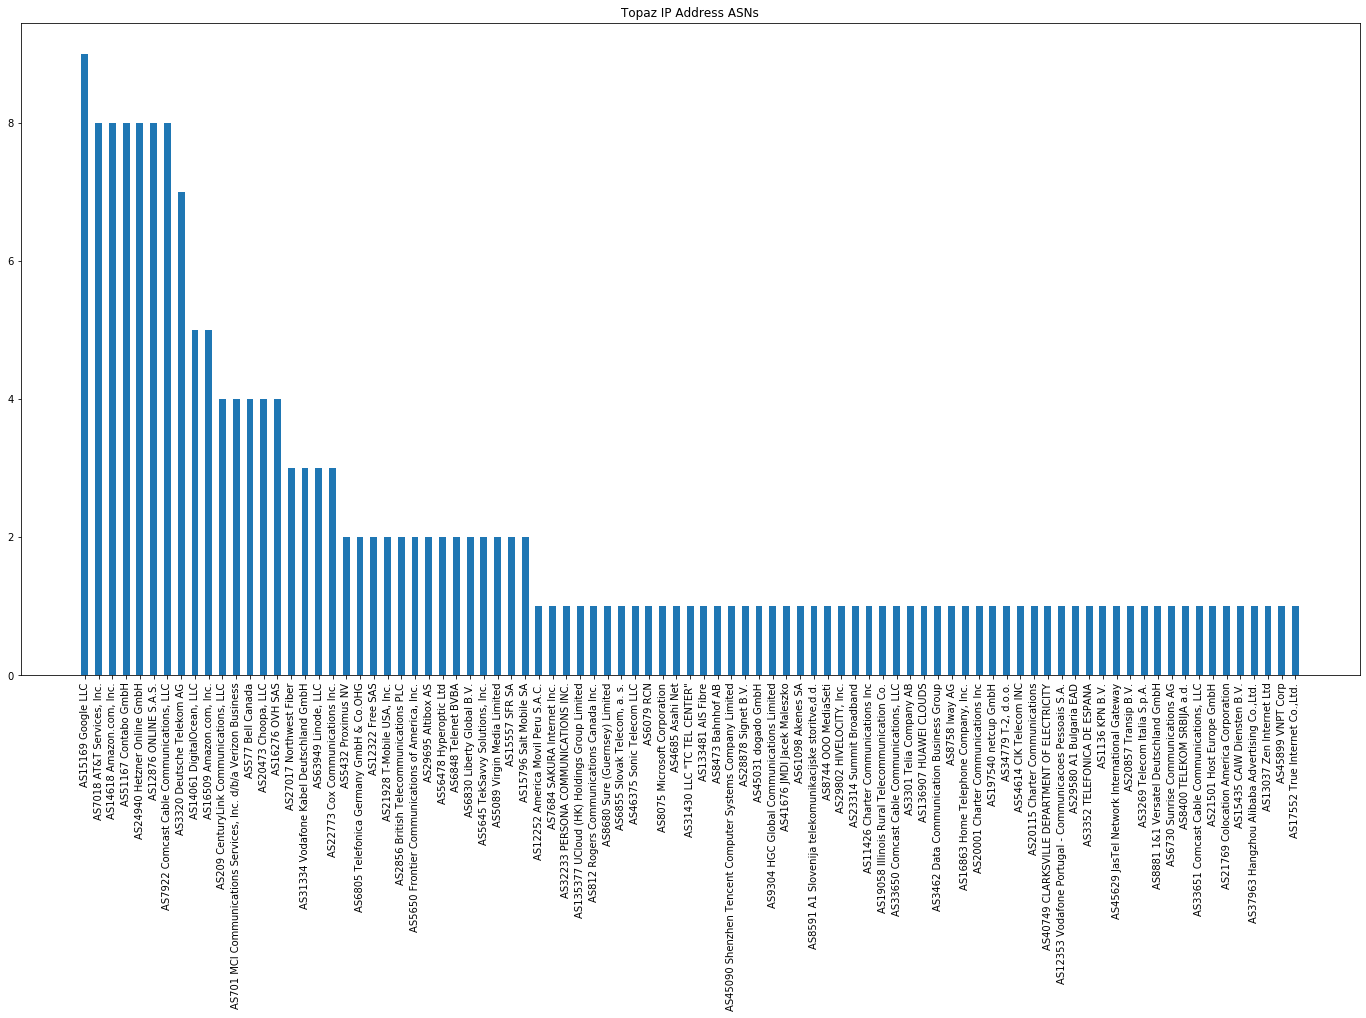

In [224]:
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt

asns=[]
for info in ips_info:
    if info.country_name != None:
        asns.append(info.org)

        
counts = Counter(asns)
counts = sorted(counts.items(), key=lambda i: i[1], reverse=True)
labels, values  = zip(*counts)

indexes = np.arange(len(labels))
width = .5
plt.figure(figsize=(24,12))
plt.title('Topaz IP Address ASNs')
plt.bar(indexes, values, width)
plt.xticks(rotation=90)
plt.xticks(indexes, labels)
plt.show()




In [225]:
sum(values)

190

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


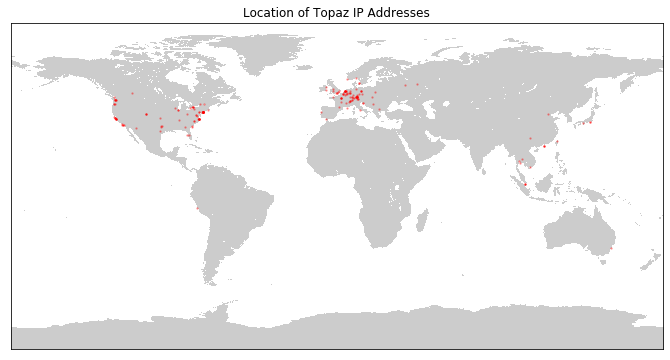

In [226]:
import os
os.environ['PROJ_LIB'] = '/Users/jonny/opt/anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

lats=[]
lons=[]
for info in ips_info:
    if info.latitude != None and info.longitude != None:
        lats.append(float(info.latitude))
        lons.append(float(info.longitude))


plt.figure(figsize=(12,6))
map = Basemap(projection='cyl', resolution='l')
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='#cc9955', lake_color='aqua')
#map.bluemarble()
map.drawlsmask()

x, y = map(lons, lats)
map.scatter(x, y, s=2, color='#ff0000', marker='o', alpha=0.3)
plt.title('Location of Topaz IP Addresses')
plt.show()

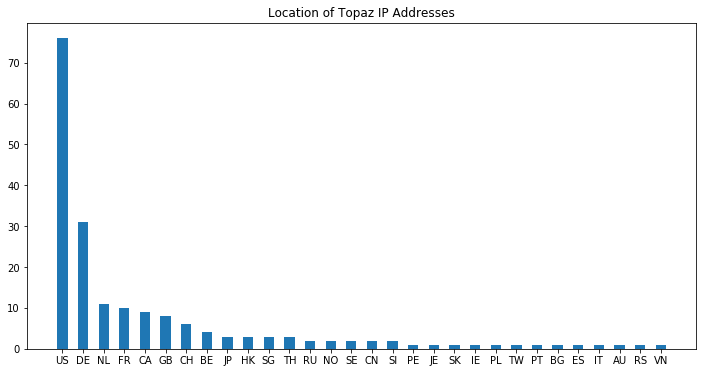

In [227]:
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt

countries=[]
for info in ips_info:
    if info.country_name != None:
        countries.append(info.country)


counts = Counter(countries)
counts = sorted(counts.items(), key=lambda i: i[1], reverse=True)
labels, values  = zip(*counts)

indexes = np.arange(len(labels))
width = .5
plt.figure(figsize=(12,6))
plt.title('Location of Topaz IP Addresses')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

In [228]:
subnets = df["subnet_ids"].to_list()
subnets = [subnet.replace('[','').replace(']','').replace(' ','') for subnet in subnets]
subnets = [subnet if len(subnet) > 0 else 'None' for subnet in subnets]
subnets = ','.join(subnets)
labels = [str(label) for label in list(range(0,5))] + ['None']
values = [subnets.count(label) for label in labels]

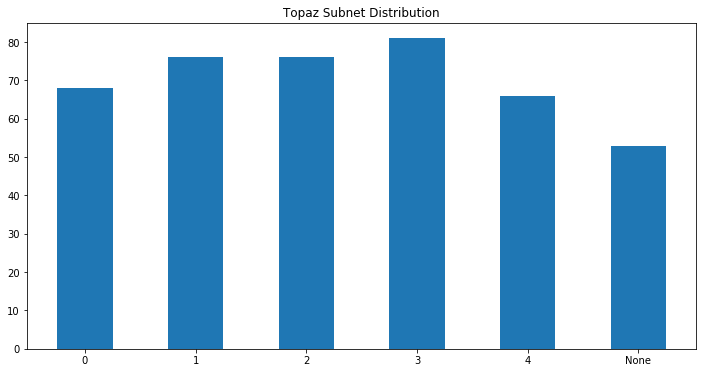

In [229]:
import numpy as np
import matplotlib.pyplot as plt

indexes = np.arange(len(labels))
width = .5
plt.figure(figsize=(12,6))
plt.title('Topaz Subnet Distribution')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()